# Capstone Project - The Battle of Neighborhoods (London)

## Topic: Finding the best area to open a new leisure centre in London

### Date: 10 April 2021

### Author: Luca Montalto Giampaoli

## 1. Introduction and description of the problem

London is one of the world's most important global cities. It exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, healthcare, media, professional services, research and development, tourism and transportation. 

London is one of the world's leading tourism destinations, and the city is home to an array of famous tourist attractions. London is also the most populous region, urban zone and metropolitan area in the United Kingdom. 

For these reasons entrepeneurs have been investing in various business activities spanning from the hospitality to wellbeing sectors, from the entertainment to cultural venues.

One of the big concerns for enterprenours when deciding to open a new business would be finding an the right area.
Therefore in this project, **I intend to explore different Inner boroughs of London and indentify the best area to find new business opportunities. This research is expected to benefit investors who want to open a new leisure centre in a profitable location**

## 2. Data Acquisition and Data processing

In this project I will be using the following datasets to help solve my problem - Greenspace Information for Greater London, List of London Boroughs and Foursquare API.

**a. Greenspace Information for Greater London**

- Percentage and count of residential households with access to at least one open space 
- source: London Datastore
- url: https://data.london.gov.uk/dataset/access-public-open-space-and-nature-ward

**b. List of London Boroughs**

- List of the boroughs in greater London
- source: Wikipedia
- url: https://en.wikipedia.org/wiki/List_of_London_boroughs
- Method: The list of the Boroughs will be taken from Wikipedia through webscraping by BeautifulSoup
- The complete dataset will include both the "Outer boroughs" and the "Inner boroughs" of London, but only the "Inner" ones will be considered

**c. FourSquare**

- A FourSquare Developer token will be generated and applied to identify the most popular venues in each individual area

### 2.1 Import required libraries

In [132]:
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner

# library to handle charts
import matplotlib.pyplot as plt

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### 2.2 Download and explore the dataset that describes the accessability to parks in London

In [160]:
# Import data of accessability to parks
parks = pd.read_csv("https://data.london.gov.uk/download/access-public-open-space-and-nature-ward/9d671c10-bb3c-460b-9d63-91a9e25f08dc/public-open-space-nature-ward_access-to-nature.csv")
parks.head()

,Ward,Old ward code,Ward name,Borough Code,Borough,% homes with good access to nature,% homes with deficiency in access to nature
0,E05000026,00ABFX,Abbey,E09000002,Barking and Dagenham,98,2
1,E05000027,00ABFY,Alibon,E09000002,Barking and Dagenham,28,72
2,E05000028,00ABFZ,Becontree,E09000002,Barking and Dagenham,83,17
3,E05000029,00ABGA,Chadwell Heath,E09000002,Barking and Dagenham,36,64
4,E05000030,00ABGB,Eastbrook,E09000002,Barking and Dagenham,100,0


In [161]:
parks.shape

(626, 7)

In [162]:
parks_df = parks.copy()
parks_df.head()


,Ward,Old ward code,Ward name,Borough Code,Borough,% homes with good access to nature,% homes with deficiency in access to nature
0,E05000026,00ABFX,Abbey,E09000002,Barking and Dagenham,98,2
1,E05000027,00ABFY,Alibon,E09000002,Barking and Dagenham,28,72
2,E05000028,00ABFZ,Becontree,E09000002,Barking and Dagenham,83,17
3,E05000029,00ABGA,Chadwell Heath,E09000002,Barking and Dagenham,36,64
4,E05000030,00ABGB,Eastbrook,E09000002,Barking and Dagenham,100,0


In [163]:
# Let's clean the dataset by removing not relevant columns

parks_df = parks_df.drop(columns=['Ward', 'Old ward code', 'Ward name', 'Borough Code', '% homes with deficiency in access to nature' ])
parks_df.rename({'% homes with good access to nature': 'Access to nature %'}, axis=1, inplace=True)
parks_df.head()

,Borough,Access to nature %
0,Barking and Dagenham,98
1,Barking and Dagenham,28
2,Barking and Dagenham,83
3,Barking and Dagenham,36
4,Barking and Dagenham,100


In [164]:
parks_df.shape

(626, 2)

In [165]:
parks_df.groupby('Borough').count().head()

,Access to nature %
Borough,
Barking and Dagenham,17
Barnet,21
Bexley,21
Brent,21
Bromley,22


In [166]:
# Calculate the mean of the access to nature % for each borough

parks_mean = parks_df.groupby('Borough').mean().reset_index()
parks_mean

,Borough,Access to nature %
0,Barking and Dagenham,71.705882
1,Barnet,82.333333
2,Bexley,83.190476
3,Brent,82.095238
4,Bromley,82.454545
5,Camden,70.555556
6,City of London,0.000000
7,Croydon,70.333333
8,Ealing,74.826087
9,Enfield,54.047619


In [167]:
parks_mean.shape

(34, 2)

### 2.2 Download and explore the dataset with the list of boroughs in Greater London

#### Retreiving the URL and creating a Beautiful soup object

In [168]:
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(website_text,'xml')
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="UTF-8"/>
  <title>
   List of London boroughs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ecbdd033-9d71-42b4-8427-56ed8d35a71a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":1014658460,"wgRevisionId":1014658460,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata"

In [169]:
# Create a list

Borough = []
Inner = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        Borough.append(cells[0].text.rstrip('\n'))
        Inner.append(cells[1].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [170]:
# Create the dataframe

dict = {'Borough' : Borough,
       'Inner' : Inner,
       'Coordinates': Coordinates}
grlondon_df = pd.DataFrame.from_dict(dict)
grlondon_df

,Borough,Inner,Coordinates
0,Barking and Dagenham [note 1],,".mw-parser-output .geo-default,.mw-parser-outp..."
1,Barnet,,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
5,Camden,Y,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
6,Croydon,,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
7,Ealing,,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
8,Enfield,,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
9,Greenwich [note 2],Y [note 3],51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


In [171]:
grlondon_df.shape

(32, 3)

In [172]:
# Get rid of unwanted texts

grlondon_df['Borough'] = grlondon_df['Borough'].map(lambda x: x.rstrip(']'))
grlondon_df['Borough'] = grlondon_df['Borough'].map(lambda x: x.rstrip('1234567890.'))
grlondon_df['Borough'] = grlondon_df['Borough'].str.replace('note','')
grlondon_df['Borough'] = grlondon_df['Borough'].map(lambda x: x.rstrip(' ['))

grlondon_df['Inner'] = grlondon_df['Inner'].map(lambda x: x.rstrip(']'))
grlondon_df['Inner'] = grlondon_df['Inner'].map(lambda x: x.rstrip('1234567890.'))
grlondon_df['Inner'] = grlondon_df['Inner'].str.replace('note','')
grlondon_df['Inner'] = grlondon_df['Inner'].map(lambda x: x.rstrip(' ['))


grlondon_df.head(10)

,Borough,Inner,Coordinates
0,Barking and Dagenham,,".mw-parser-output .geo-default,.mw-parser-outp..."
1,Barnet,,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
5,Camden,Y,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
6,Croydon,,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
7,Ealing,,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
8,Enfield,,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
9,Greenwich,Y,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


In [173]:
# Drop first row as the coordinates field is not as expected and also because Barking and Dagenham are not included within the inner boroughts

grlondon_df = grlondon_df.drop([grlondon_df.index[0]], inplace=False)
grlondon_df.reset_index(drop=True, inplace=True)
grlondon_df.head()

,Borough,Inner,Coordinates
0,Barnet,,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
1,Bexley,,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
2,Brent,,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
3,Bromley,,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
4,Camden,Y,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...


In [175]:
# Clean coordinates

grlondon_df[['Coordinates1','Coordinates2','Coordinates3']] = grlondon_df['Coordinates'].str.split('/',expand=True)
grlondon_df.head(10)

,Borough,Inner,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barnet,,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
1,Bexley,,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
2,Brent,,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
3,Bromley,,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)
4,Camden,Y,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,51°31′44″N 0°07′32″W﻿,﻿51.5290°N 0.1255°W﻿,51.5290; -0.1255﻿ (Camden)
5,Croydon,,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,51°22′17″N 0°05′52″W﻿,﻿51.3714°N 0.0977°W﻿,51.3714; -0.0977﻿ (Croydon)
6,Ealing,,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,51°30′47″N 0°18′32″W﻿,﻿51.5130°N 0.3089°W﻿,51.5130; -0.3089﻿ (Ealing)
7,Enfield,,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,51°39′14″N 0°04′48″W﻿,﻿51.6538°N 0.0799°W﻿,51.6538; -0.0799﻿ (Enfield)
8,Greenwich,Y,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,51°29′21″N 0°03′53″E﻿,﻿51.4892°N 0.0648°E﻿,51.4892; 0.0648﻿ (Greenwich)
9,Hackney,Y,51°32′42″N 0°03′19″W﻿ / ﻿51.5450°N 0.0553°W﻿ /...,51°32′42″N 0°03′19″W﻿,﻿51.5450°N 0.0553°W﻿,51.5450; -0.0553﻿ (Hackney)


In [176]:
# Coordinates3 has the coordinate format that we need but needs to be split in Latitude and Longitude

grlondon_df.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
grlondon_df[['Latitude','Longitude']] = grlondon_df['Coordinates3'].str.split(';',expand=True)
grlondon_df.head()

,Borough,Inner,Coordinates3,Latitude,Longitude
0,Barnet,,51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
1,Bexley,,51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
2,Brent,,51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
3,Bromley,,51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)
4,Camden,Y,51.5290; -0.1255﻿ (Camden),51.5290,-0.1255﻿ (Camden)


In [177]:
grlondon_df.drop(labels=['Coordinates3'], axis=1,inplace = True)
grlondon_df.head()

,Borough,Inner,Latitude,Longitude
0,Barnet,,51.6252,-0.1517﻿ (Barnet)
1,Bexley,,51.4549,0.1505﻿ (Bexley)
2,Brent,,51.5588,-0.2817﻿ (Brent)
3,Bromley,,51.4039,0.0198﻿ (Bromley)
4,Camden,Y,51.5290,-0.1255﻿ (Camden)


In [178]:
# Longitude column must be cleaned further
grlondon_df['Longitude'] = grlondon_df['Longitude'].map(lambda x: x.rstrip(')'))
grlondon_df['Longitude'] = grlondon_df['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
grlondon_df['Longitude'] = grlondon_df['Longitude'].map(lambda x: x.rstrip(' ('))
grlondon_df['Longitude'] = grlondon_df['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
grlondon_df['Longitude'] = grlondon_df['Longitude'].map(lambda x: x.lstrip())
grlondon_df

,Borough,Inner,Latitude,Longitude
0,Barnet,,51.6252,-0.1517
1,Bexley,,51.4549,0.1505
2,Brent,,51.5588,-0.2817
3,Bromley,,51.4039,0.0198
4,Camden,Y,51.5290,-0.1255
5,Croydon,,51.3714,-0.0977
6,Ealing,,51.5130,-0.3089
7,Enfield,,51.6538,-0.0799
8,Greenwich,Y,51.4892,0.0648
9,Hackney,Y,51.5450,-0.0553


Let's simplify the above list and segment and cluster only the Inner Boroughs. So let's slice the original dataframe and create a new dataframe of the London data.

In [179]:
london_df=grlondon_df.copy()
london_df.head()

,Borough,Inner,Latitude,Longitude
0,Barnet,,51.6252,-0.1517
1,Bexley,,51.4549,0.1505
2,Brent,,51.5588,-0.2817
3,Bromley,,51.4039,0.0198
4,Camden,Y,51.5290,-0.1255


In [180]:
for index, row in london_df.iterrows(): # iterate over rows in dataframe
   
    if 'Y' not in row['Inner']:
        london_df.drop(index, inplace=True)
        
london_df.reset_index(drop=True, inplace=True)

london_df

,Borough,Inner,Latitude,Longitude
0,Camden,Y,51.5290,-0.1255
1,Greenwich,Y,51.4892,0.0648
2,Hackney,Y,51.5450,-0.0553
3,Hammersmith and Fulham,Y,51.4927,-0.2339
4,Islington,Y,51.5416,-0.1022
5,Kensington and Chelsea,Y,51.5020,-0.1947
6,Lambeth,Y,51.4607,-0.1163
7,Lewisham,Y,51.4452,-0.0209
8,Southwark,Y,51.5035,-0.0804
9,Tower Hamlets,Y,51.5099,-0.0059


In [181]:
# Let's drop the Inner column

london_df = london_df.drop(columns=['Inner'])
london_df

,Borough,Latitude,Longitude
0,Camden,51.5290,-0.1255
1,Greenwich,51.4892,0.0648
2,Hackney,51.5450,-0.0553
3,Hammersmith and Fulham,51.4927,-0.2339
4,Islington,51.5416,-0.1022
5,Kensington and Chelsea,51.5020,-0.1947
6,Lambeth,51.4607,-0.1163
7,Lewisham,51.4452,-0.0209
8,Southwark,51.5035,-0.0804
9,Tower Hamlets,51.5099,-0.0059


In [182]:
london_df.shape

(12, 3)

In [16]:
london_df['Borough'].unique()

array(['Camden', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Islington', 'Kensington and Chelsea', 'Lambeth', 'Lewisham',
       'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster'],
      dtype=object)

### 2.3 Combine Access to parks and London boroughs dataset

In this section, we will explore the cleansed data more thoroughly using visualizations.

In [183]:
#Combine parks data and borough information data
london_parks_df = pd.merge(parks_mean,london_df, how='outer', on='Borough')
london_parks_df.head()
    

,Borough,Access to nature %,Latitude,Longitude
0,Barking and Dagenham,71.705882,NaN,NaN
1,Barnet,82.333333,NaN,NaN
2,Bexley,83.190476,NaN,NaN
3,Brent,82.095238,NaN,NaN
4,Bromley,82.454545,NaN,NaN


In [184]:
# Remove NaN to consider only Inner Boroughs

london_parks_df.dropna(subset = ["Latitude"], inplace=True)
london_parks_df

,Borough,Access to nature %,Latitude,Longitude
5,Camden,70.555556,51.5290,-0.1255
10,Greenwich,87.117647,51.4892,0.0648
11,Hackney,74.105263,51.5450,-0.0553
12,Hammersmith and Fulham,64.125000,51.4927,-0.2339
18,Islington,67.562500,51.5416,-0.1022
19,Kensington and Chelsea,90.444444,51.5020,-0.1947
21,Lambeth,63.333333,51.4607,-0.1163
22,Lewisham,86.166667,51.4452,-0.0209
28,Southwark,70.428571,51.5035,-0.0804
30,Tower Hamlets,64.941176,51.5099,-0.0059


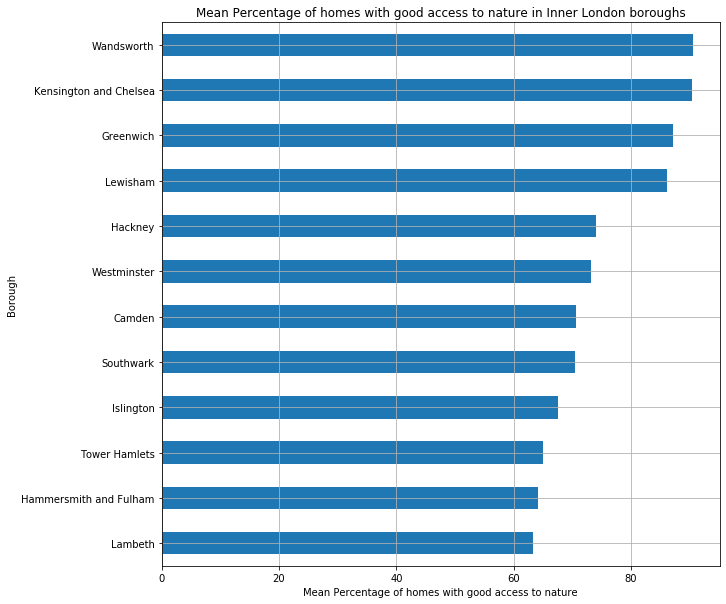

In [186]:
# Visualize accessability to park data
london_parks_df.set_index('Borough')['Access to nature %'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Mean Percentage of homes with good access to nature')
plt.title('Mean Percentage of homes with good access to nature in Inner London boroughs')
plt.show()

Lambeth has the smallest percentage of homes with good access to nature, followed by  Hammersmith and Fulham, and Tower Hamlets.

### 2.4 Exploration of the boroughs and their segmentation

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [187]:
london_df.head()

,Borough,Latitude,Longitude
0,Camden,51.5290,-0.1255
1,Greenwich,51.4892,0.0648
2,Hackney,51.5450,-0.0553
3,Hammersmith and Fulham,51.4927,-0.2339
4,Islington,51.5416,-0.1022


In [188]:
london_df.loc[0, 'Borough']

'Camden'

In [189]:
borough_latitude = london_df.loc[0, 'Latitude'] # borough latitude value
borough_longitude = london_df.loc[0, 'Longitude'] # borough longitude value

borough_name = london_df.loc[0, 'Borough'] # borough name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Camden are  51.5290, -0.1255.


#### Now, let's get the top 100 venues that are in Camden within a radius of 500 meters.


Define Foursquare Credentials and Version

In [276]:
CLIENT_ID = 'Omitted' # the Foursquare ID has been omitted
CLIENT_SECRET = 'Omitted' # the Foursquare Secret has been omitted
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Omitted
CLIENT_SECRET:Omitted


First, let's create the GET request URL. Name your URL **url**.

In [191]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RKYGZTPXZTXEX2ZPKBBJAWJFWHJYNJ3URWTT3C00PXN0ZYDF&client_secret=VDEFWNXMKMKABYXCCXS5QG0PQTOONQBUVF3RHUU4FJODDHGJ&v=20180605&ll= 51.5290,-0.1255&radius=500&limit=100'

Send the GET request and examine the resutls

In [192]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60718a4ba42e587ddaa967d6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': "King's Cross",
  'headerFullLocation': "King's Cross, London",
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 67,
  'suggestedBounds': {'ne': {'lat': 51.533500004500006,
    'lng': -0.11828014898155433},
   'sw': {'lat': 51.5244999955, 'lng': -0.13271985101844566}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4daeaa490437710b8137b098',
       'name': 'The Sir John Ritblat Gallery: Treasures of the British Library',
       'location': {'address': '96 Euston Road',
        'crossStreet': 'The British Library',
        'lat': 51.52966611994934,
       

We know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.


In [193]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [194]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,The Sir John Ritblat Gallery: Treasures of the...,Museum,51.529666,-0.127541
1,St. Pancras Renaissance Hotel London,Hotel,51.529733,-0.125912
2,Origin Coffee Roasters,Coffee Shop,51.529133,-0.126618
3,Pullman London St Pancras,Hotel,51.528668,-0.128191
4,Half Cup,Café,51.527838,-0.124951


And how many venues were returned by Foursquare?

In [195]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

67 venues were returned by Foursquare.


### 2.4.1 Explore Boroughs in London

#### Let's create a function to repeat the same process to all the boroughs in London


In [196]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each borough and create a new dataframe called london_venues.

In [197]:
london_venues = getNearbyVenues(names=london_df['Borough'],
                                   latitudes=london_df['Latitude'],
                                   longitudes=london_df['Longitude']
                                  )

Camden
Greenwich
Hackney
Hammersmith and Fulham
Islington
Kensington and Chelsea
Lambeth
Lewisham
Southwark
Tower Hamlets
Wandsworth
Westminster


#### Let's check the size of the resulting dataframe

In [198]:
print(london_venues.shape)
london_venues.head()

(707, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Camden,51.5290,-0.1255,The Sir John Ritblat Gallery: Treasures of the...,51.529666,-0.127541,Museum
1,Camden,51.5290,-0.1255,St. Pancras Renaissance Hotel London,51.529733,-0.125912,Hotel
2,Camden,51.5290,-0.1255,Origin Coffee Roasters,51.529133,-0.126618,Coffee Shop
3,Camden,51.5290,-0.1255,Pullman London St Pancras,51.528668,-0.128191,Hotel
4,Camden,51.5290,-0.1255,Half Cup,51.527838,-0.124951,Café


Let's check how many venues were returned for each borough

In [199]:
london_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Camden,67,67,67,67,67,67
Greenwich,37,37,37,37,37,37
Hackney,61,61,61,61,61,61
Hammersmith and Fulham,81,81,81,81,81,81
Islington,46,46,46,46,46,46
Kensington and Chelsea,53,53,53,53,53,53
Lambeth,100,100,100,100,100,100
Lewisham,30,30,30,30,30,30
Southwark,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues


In [30]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 162 uniques categories.


In [200]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add borough column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move borough column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Camden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Camden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Camden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Camden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Camden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [32]:
london_onehot.shape

(707, 163)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [33]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Yoga Studio
0,Camden,0.000000,0.00,0.000000,0.00,0.014925,0.000000,0.000000,0.000000,0.00,0.014925,0.014925,0.00,0.00,0.000000,0.000000,0.014925,0.000000,0.00,0.029851,0.00000,0.029851,0.000000,0.000000,0.000000,0.104478,0.000000,0.00,0.00,0.00000,0.00,0.000000,0.014925,0.000000,0.000000,0.000000,0.104478,0.000000,0.00,0.000000,0.014925,0.000000,0.014925,0.00,0.000000,0.000000,0.00,0.00,0.014925,0.00,0.014925,0.014925,0.00,0.014925,0.014925,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.014925,0.000000,0.000000,0.014925,0.000000,0.014925,0.014925,0.014925,0.014925,0.000000,0.014925,0.000000,0.00,0.000000,0.000000,0.074627,0.014925,0.000000,0.000000,0.014925,0.00,0.029851,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.00000,0.014925,0.000000,0.000000,0.00,0.00,0.00,0.00000,0.000000,0.00,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029851,0.000000,0.000000,0.000000,0.000000,0.014925,0.059701,0.000000,0.000000,0.000000,0.014925,0.00,0.014925,0.00,0.000000,0.000000,0.00,0.000000,0.014925,0.000000,0.00000,0.000000,0.00,0.000000,0.014925,0.014925,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029851,0.014925,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Greenwich,0.027027,0.00,0.000000,0.00,0.000000,0.000000,0.027027,0.000000,0.00,0.027027,0.000000,0.00,0.00,0.000000,0.000000,0.027027,0.000000,0.00,0.027027,0.00000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.081081,0.000000,0.08108

#### Let's confirm the new size


In [34]:
london_grouped.shape

(12, 163)

#### Let's print each neighborhood along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in london_grouped['Borough']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Camden----
          venue  freq
0   Coffee Shop  0.10
1          Café  0.10
2         Hotel  0.07
3           Pub  0.06
4  Burger Joint  0.03


----Greenwich----
            venue  freq
0             Pub  0.08
1     Supermarket  0.08
2     Coffee Shop  0.08
3  Clothing Store  0.08
4   Grocery Store  0.05


----Hackney----
          venue  freq
0           Pub  0.08
1   Coffee Shop  0.07
2  Cocktail Bar  0.05
3        Bakery  0.05
4       Brewery  0.05


----Hammersmith and Fulham----
                venue  freq
0                 Pub  0.14
1                Café  0.07
2  Italian Restaurant  0.05
3   Indian Restaurant  0.05
4  Chinese Restaurant  0.04


----Islington----
                venue  freq
0                 Pub  0.20
1              Bakery  0.07
2  Turkish Restaurant  0.04
3                Park  0.04
4        Cocktail Bar  0.04


----Kensington and Chelsea----
               venue  freq
0             Bakery  0.06
1          Juice Bar  0.06
2               Café  0.06
3  French

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.


In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [255]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,Coffee Shop,Café,Hotel,Pub,Italian Restaurant,Pizza Place,Breakfast Spot,Train Station,Burger Joint,Falafel Restaurant
1,Greenwich,Coffee Shop,Clothing Store,Supermarket,Pub,Pharmacy,Hotel,Grocery Store,Fast Food Restaurant,Plaza,Sandwich Place
2,Hackney,Pub,Coffee Shop,Cocktail Bar,Bakery,Café,Brewery,Park,Clothing Store,Organic Grocery,Hotel
3,Hammersmith and Fulham,Pub,Café,Indian Restaurant,Italian Restaurant,Gastropub,Hotel,Coffee Shop,Clothing Store,Chinese Restaurant,Bus Stop
4,Islington,Pub,Bakery,Ice Cream Shop,Park,Boutique,Burger Joint,Cocktail Bar,Turkish Restaurant,Music Venue,Theater
5,Kensington and Chelsea,Bakery,French Restaurant,Juice Bar,Café,Hotel,Burger Joint,Italian Restaurant,Spa,Restaurant,Pub
6,Lambeth,Caribbean Restaurant,Market,Pub,Coffee Shop,Gym / Fitness Center,Beer Bar,Pizza Place,Nightclub,Grocery Store,Sandwich Place
7,Lewisham,Supermarket,Grocery Store,Coffee Shop,Platform,Train Station,Italian Restaurant,Pizza Place,Bakery,Shopping Mall,Bus Stop
8,Southwark,Coffee Shop,Pub,Bar,Scenic Lookout,Cocktail Bar,Restaurant,French Restaurant,Hotel,English Restaurant,Italian Restaurant
9,Tower Hamlets,Hotel,Sandwich Place,Coffee Shop,Italian Restaurant,Fried Chicken Joint,Light Rail Station,Café,Pub,Convenience Store,Grocery Store


### 2.5 Cluster Analysis

In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

**Run _k_-means to cluster the borough into 5 clusters.**

In [257]:
kclusters = 5
london_cluster = london_grouped.drop('Borough', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([2, 1, 2, 2, 0, 2, 2, 4, 2, 3], dtype=int32)

In [260]:
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [261]:
# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = london_df
london_merged = london_merged.join(borough_venues_sorted.set_index('Borough'), on='Borough')

london_merged



,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,51.5290,-0.1255,2,Coffee Shop,Café,Hotel,Pub,Italian Restaurant,Pizza Place,Breakfast Spot,Train Station,Burger Joint,Falafel Restaurant
1,Greenwich,51.4892,0.0648,1,Coffee Shop,Clothing Store,Supermarket,Pub,Pharmacy,Hotel,Grocery Store,Fast Food Restaurant,Plaza,Sandwich Place
2,Hackney,51.5450,-0.0553,2,Pub,Coffee Shop,Cocktail Bar,Bakery,Café,Brewery,Park,Clothing Store,Organic Grocery,Hotel
3,Hammersmith and Fulham,51.4927,-0.2339,2,Pub,Café,Indian Restaurant,Italian Restaurant,Gastropub,Hotel,Coffee Shop,Clothing Store,Chinese Restaurant,Bus Stop
4,Islington,51.5416,-0.1022,0,Pub,Bakery,Ice Cream Shop,Park,Boutique,Burger Joint,Cocktail Bar,Turkish Restaurant,Music Venue,Theater
5,Kensington and Chelsea,51.5020,-0.1947,2,Bakery,French Restaurant,Juice Bar,Café,Hotel,Burger Joint,Italian Restaurant,Spa,Restaurant,Pub
6,Lambeth,51.4607,-0.1163,2,Caribbean Restaurant,Market,Pub,Coffee Shop,Gym / Fitness Center,Beer Bar,Pizza Place,Nightclub,Grocery Store,Sandwich Place
7,Lewisham,51.4452,-0.0209,4,Supermarket,Grocery Store,Coffee Shop,Platform,Train Station,Italian Restaurant,Pizza Place,Bakery,Shopping Mall,Bus Stop
8,Southwark,51.5035,-0.0804,2,Coffee Shop,Pub,Bar,Scenic Lookout,Cocktail Bar,Restaurant,French Restaurant,Hotel,English Restaurant,Italian Restaurant
9,Tower Hamlets,51.5099,-0.0059,3,Hotel,Sandwich Place,Coffee Shop,Italian Restaurant,Fried Chicken Joint,Light Rail Station,Café,Pub,Convenience Store,Grocery Store


### 2.5.1 Clusters examination

#### Now, we examine each cluster and determine the discriminating venue categories that distinguish each cluster.

#### Cluster 0

In [262]:
# Cluster 0: Lively area
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Islington,0,Pub,Bakery,Ice Cream Shop,Park,Boutique,Burger Joint,Cocktail Bar,Turkish Restaurant,Music Venue,Theater


#### Cluster 1

In [263]:
# Cluster 1 Quiet area
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Greenwich,1,Coffee Shop,Clothing Store,Supermarket,Pub,Pharmacy,Hotel,Grocery Store,Fast Food Restaurant,Plaza,Sandwich Place
10,Wandsworth,1,Coffee Shop,Pub,Clothing Store,Breakfast Spot,Supermarket,Gym / Fitness Center,Indian Restaurant,Chaat Place,Gift Shop,Bus Stop


#### Cluster 2

In [264]:
# Cluster 2 busy area
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,2,Coffee Shop,Café,Hotel,Pub,Italian Restaurant,Pizza Place,Breakfast Spot,Train Station,Burger Joint,Falafel Restaurant
2,Hackney,2,Pub,Coffee Shop,Cocktail Bar,Bakery,Café,Brewery,Park,Clothing Store,Organic Grocery,Hotel
3,Hammersmith and Fulham,2,Pub,Café,Indian Restaurant,Italian Restaurant,Gastropub,Hotel,Coffee Shop,Clothing Store,Chinese Restaurant,Bus Stop
5,Kensington and Chelsea,2,Bakery,French Restaurant,Juice Bar,Café,Hotel,Burger Joint,Italian Restaurant,Spa,Restaurant,Pub
6,Lambeth,2,Caribbean Restaurant,Market,Pub,Coffee Shop,Gym / Fitness Center,Beer Bar,Pizza Place,Nightclub,Grocery Store,Sandwich Place
8,Southwark,2,Coffee Shop,Pub,Bar,Scenic Lookout,Cocktail Bar,Restaurant,French Restaurant,Hotel,English Restaurant,Italian Restaurant


#### Cluster 3

In [265]:
# Cluster 3 traveller area

london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Tower Hamlets,3,Hotel,Sandwich Place,Coffee Shop,Italian Restaurant,Fried Chicken Joint,Light Rail Station,Café,Pub,Convenience Store,Grocery Store
11,Westminster,3,Hotel,Coffee Shop,Sandwich Place,Italian Restaurant,Theater,Sushi Restaurant,Pub,Gym / Fitness Center,Hotel Bar,Juice Bar


#### Cluster 4

In [266]:
# Cluster 4 family area

london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Lewisham,4,Supermarket,Grocery Store,Coffee Shop,Platform,Train Station,Italian Restaurant,Pizza Place,Bakery,Shopping Mall,Bus Stop


### 3. Results and Recommendations 

Now we will review all the analysis made in this project before we make a conclusion on which area in Lodon to open a leisure centre.

Like mentioned in the beginning, our key criteria of location decision will be based on current data of accessability to green areas and parks.

**Accessability to nature**

The boroughs in London with little access to green areas have been identified such as areas with more opportunities for the opening of a leisure centre as more likely more abitants will need a space with exercise facilities.

In [275]:
london_parks_df.sort_values(by='Access to nature %', ascending = True)

,Borough,Access to nature %,Latitude,Longitude
21,Lambeth,63.333333,51.4607,-0.1163
12,Hammersmith and Fulham,64.125000,51.4927,-0.2339
30,Tower Hamlets,64.941176,51.5099,-0.0059
18,Islington,67.562500,51.5416,-0.1022
28,Southwark,70.428571,51.5035,-0.0804
5,Camden,70.555556,51.5290,-0.1255
33,Westminster,73.150000,51.4973,-0.1372
11,Hackney,74.105263,51.5450,-0.0553
22,Lewisham,86.166667,51.4452,-0.0209
10,Greenwich,87.117647,51.4892,0.0648


By setting a threshold at 70%, the boroughs to analise are Lambeth, H&F, TH and Islington in order.

**Lambeth**

Lambeth is within **Cluster 2** and according to my interpretation Cluster 2 identifies a **busy area**. 
Also, by looking at the most common venues Gyms and Fitness centres have been identified as 5th most common venue.

**Hammersmith and Fulham**

H&F is also within **Cluster 2**, however looks like gyms and leisure centres are not popular venues.

**Tower Hamlets**

TH is within **Cluster 3** and according to my interpretation Cluster 2 identifies a **traveller area** with Hotels as top venues. Also in this case, gyms and leisure centres are not popular venues.

**Islington**

Islington is within **Cluster 0** and according to my interpretation Cluster 0 identifies a **lively area** with Hotels as top venues. Also in this case, gyms and leisure centres are not popular venues however a park have been included as one of the most common venues (4th in the rank).

### 4. Conclusion

From our analysis, we have found that the five boroughs below are potentially the best places to build a student hall, based on accessability to green areas across the London inner boroughs.

However, the clustering analysis helps to determine further whcih of the above boroughs may have more potential.
**Hammersmith and Fulham, and Tower Hamlets** seems to be good options where to open new leisure centres as they might fill a gap in the market and offset the lack of such venues.

### 5. Limitations and opportunities

To have more accurate results, we will need further data such as the actual number of gyms, fitness and leisure centres across London as well as the average age of the residents.  However, this research was still meaningful as we were able to carry out a deep amalysis of the boroughs.